In [10]:
import pandas as pd # type: ignore

# Load dataset
file_path = 'hotel_booking.csv'
df = pd.read_csv(file_path)

# Display basic info
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [11]:
# Assuming df is your DataFrame
# Convert the 'reservation_status_date' column to a datetime format with the correct date format (dd-mm-yyyy)
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='%d-%m-%Y', errors='coerce')

# Alternatively, to handle mixed formats, you can use the 'dayfirst' parameter
# df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], dayfirst=True, errors='coerce')

# Check the cleaned DataFrame by printing the first few rows
print(df.head())



          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1     

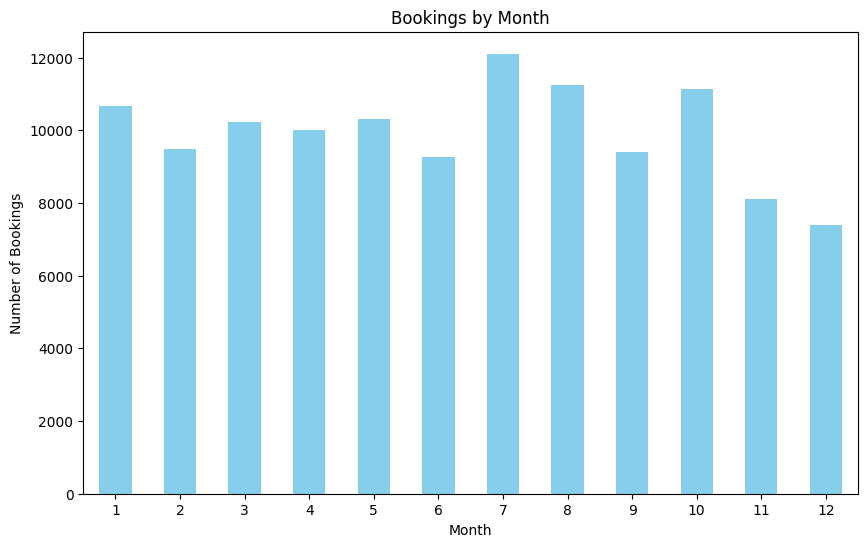

<Axes: xlabel='reservation_year'>

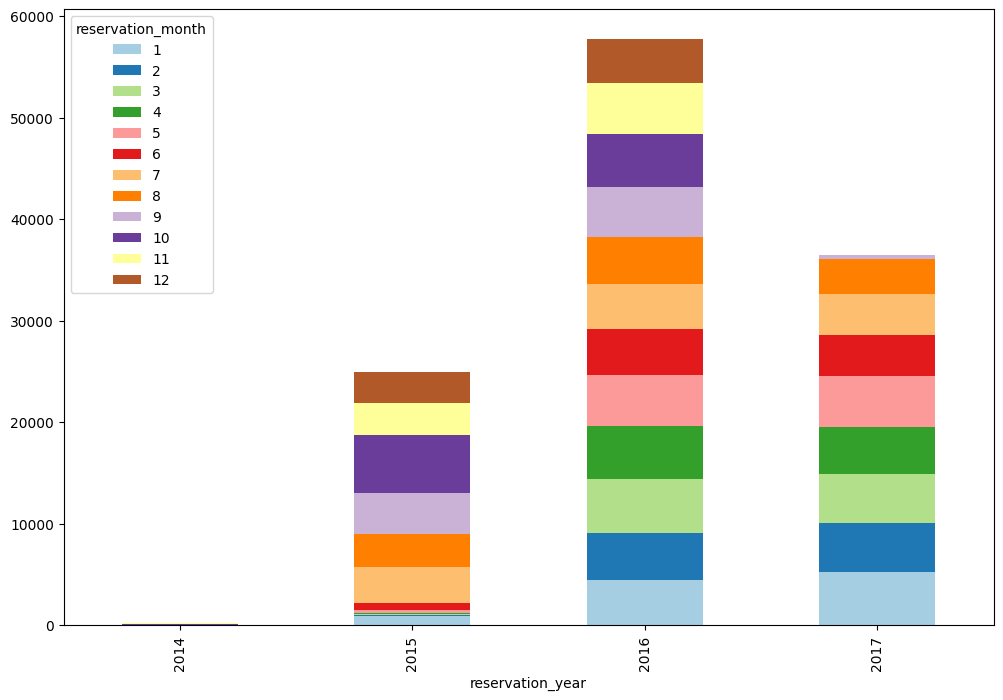

In [12]:


df['reservation_year'] = df['reservation_status_date'].dt.year
df['reservation_month'] = df['reservation_status_date'].dt.month

monthly_bookings = df.groupby('reservation_month').size()

import matplotlib.pyplot as plt  #importing for graph works 

plt.figure(figsize=(10, 6))
monthly_bookings.plot(kind='bar', color='skyblue')
plt.title('Bookings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=0)
plt.show()

monthly_bookings = df.groupby(['reservation_year', 'reservation_month']).size().unstack()
monthly_bookings.plot(kind='bar', stacked=True, figsize=(12, 8), color=plt.cm.Paired.colors)



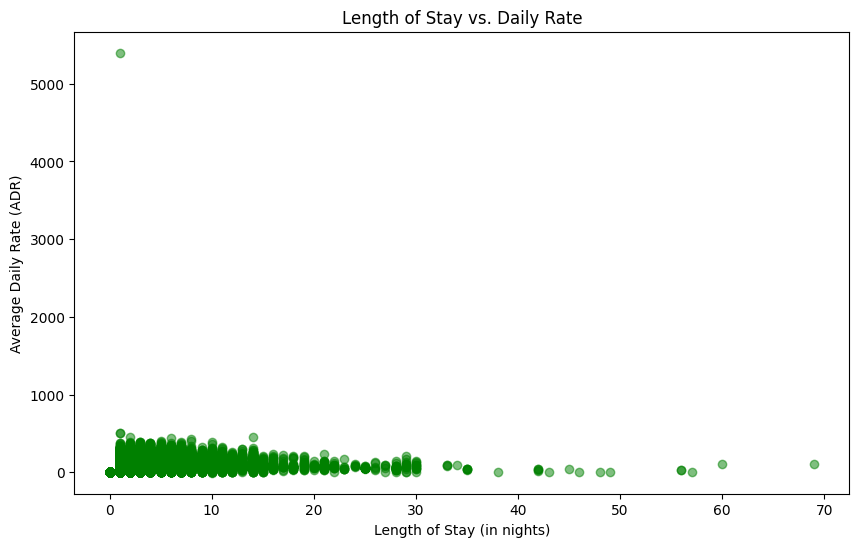

                length_of_stay       adr
length_of_stay        1.000000  0.067945
adr                   0.067945  1.000000


In [13]:
# Calculate the total length of stay (sum of weekend and weekday nights)
df['length_of_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Plot the relationship between length of stay and average daily rate (ADR)
plt.figure(figsize=(10, 6))
plt.scatter(df['length_of_stay'], df['adr'], alpha=0.5, color='green')
plt.title('Length of Stay vs. Daily Rate')
plt.xlabel('Length of Stay (in nights)')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()

# Calculate the correlation coefficient between length of stay and ADR
corr = df[['length_of_stay', 'adr']].corr()
print(corr)




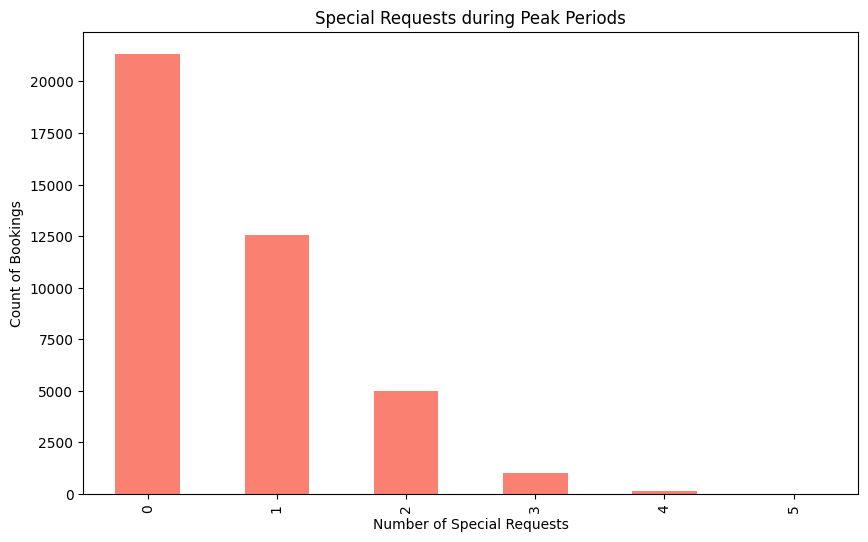

In [14]:
# Count special requests during peak periods
peak_periods = df[df['reservation_month'].isin([6, 7, 8, 12])]  # Summer and Holidays as peak periods
special_requests = peak_periods.groupby('total_of_special_requests').size()

# Plot special requests during peak periods
special_requests.plot(kind='bar', color='salmon', figsize=(10, 6))
plt.title('Special Requests during Peak Periods')
plt.xlabel('Number of Special Requests')
plt.ylabel('Count of Bookings')
plt.show()


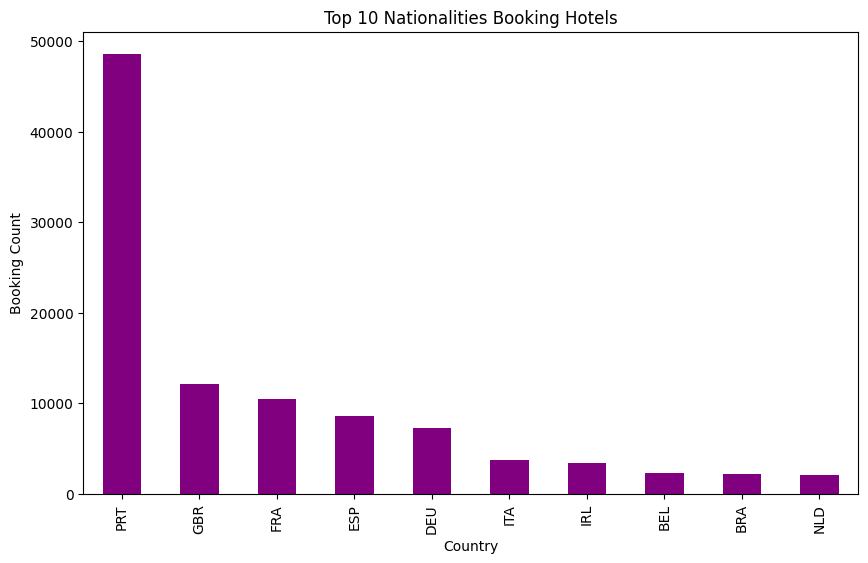

In [15]:
# Group bookings by nationality or other demographic factors
nationality_bookings = df.groupby('country').size()

# Plot the number of bookings by nationality
nationality_bookings.nlargest(10).plot(kind='bar', figsize=(10, 6), color='purple')
plt.title('Top 10 Nationalities Booking Hotels')
plt.xlabel('Country')
plt.ylabel('Booking Count')
plt.show()


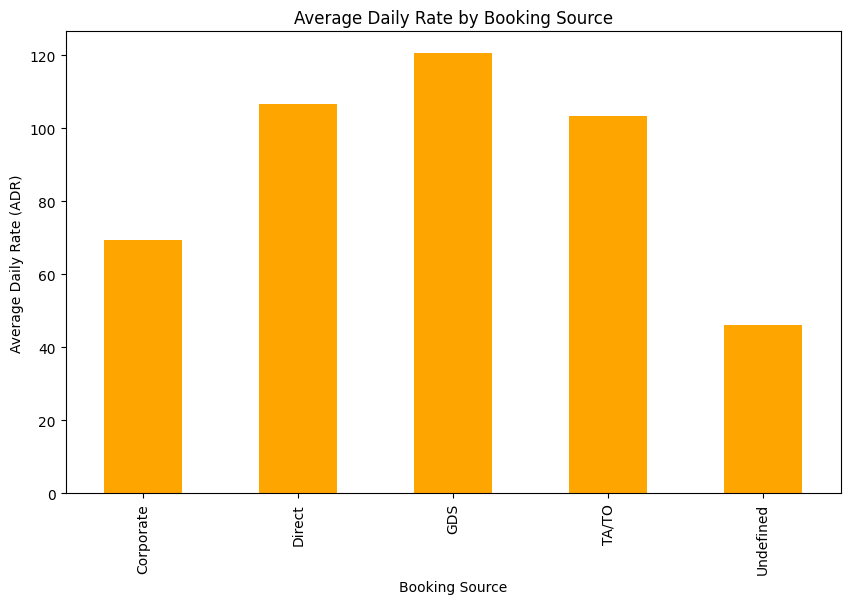

In [16]:
# Plot price sensitivity by booking source (OTAs vs. direct bookings)
booking_source_price = df.groupby('distribution_channel')['adr'].mean()

booking_source_price.plot(kind='bar', figsize=(10, 6), color='orange')
plt.title('Average Daily Rate by Booking Source')
plt.xlabel('Booking Source')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()


                     adr  occupancy_rate
adr             1.000000       -0.047557
occupancy_rate -0.047557        1.000000


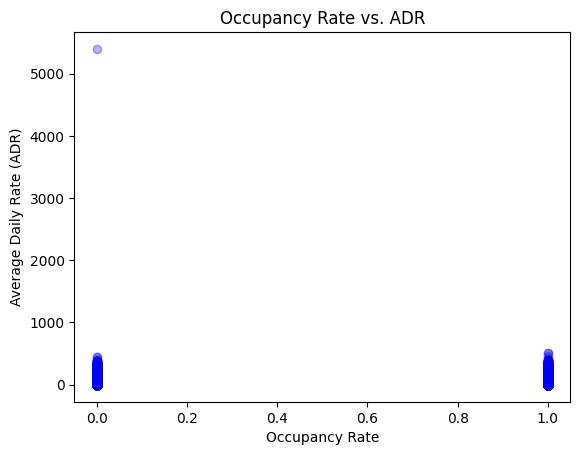

In [17]:
# Plot ADR vs. occupancy rate
df['occupancy_rate'] = df['is_canceled'].apply(lambda x: 0 if x == 1 else 1)  # Assuming 1 means canceled
occupancy_price_corr = df[['adr', 'occupancy_rate']].corr()

print(occupancy_price_corr)

plt.scatter(df['occupancy_rate'], df['adr'], alpha=0.3, color='blue')
plt.title('Occupancy Rate vs. ADR')
plt.xlabel('Occupancy Rate')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()


<Figure size 1000x600 with 0 Axes>

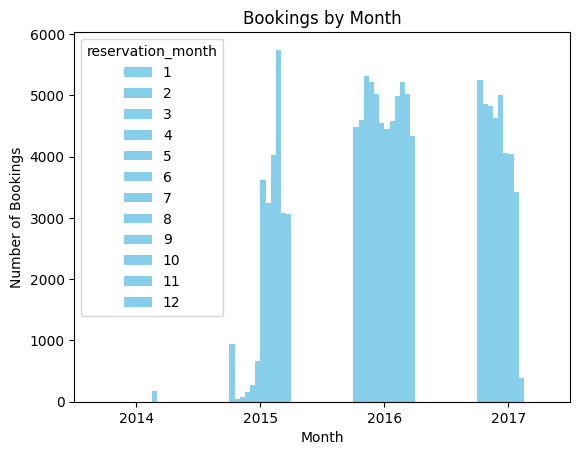

In [18]:
# Save the cleaned data
df.to_csv('cleaned_hotel_bookings.csv', index=False)

# Optionally, save plots or results as images
plt.figure(figsize=(10, 6))
monthly_bookings.plot(kind='bar', color='skyblue')
plt.title('Bookings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=0)
plt.savefig('monthly_bookings.png')
